In [2]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import tensorflow.keras as keras
keras.__version__
from keras.regularizers import l2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/horse-or-human_dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
base_dir = '/tmp/horse-or-human_dataset'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

# Directory with our training horses pictures
train_horses_dir = os.path.join(train_dir, 'horses')
# Directory with our training humans pictures
train_humans_dir = os.path.join(train_dir, 'humans')

# Directory with our test horses pictures
val_horses_dir = os.path.join(test_dir, 'horses')
# Directory with our test humans pictures
val_humans_dir = os.path.join(test_dir, 'humans')

NameError: ignored

In [6]:
from keras import models
from keras import layers
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

58892288/58889256 [==============================] - 0s 0us/step


In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               42467840  
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [ ]:
conv_base.trainable = False

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)


# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow test images in batches of 20 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [10]:
history = model.fit(
      train_generator,
      steps_per_epoch=51,  # 1027 images = batch_size * steps
      epochs=30,
      validation_data=test_generator,
      validation_steps=12)

Epoch 1/30
51/51 [==============================] - 9s 177ms/step - loss: 1.3323e-09 - acc: 1.0000 - val_loss: 0.7854 - val_acc: 0.9250
Epoch 2/30
51/51 [==============================] - 9s 177ms/step - loss: 6.5727e-10 - acc: 1.0000 - val_loss: 0.7989 - val_acc: 0.9292
Epoch 3/30
51/51 [==============================] - 9s 178ms/step - loss: 4.5035e-10 - acc: 1.0000 - val_loss: 0.8768 - val_acc: 0.9167
Epoch 4/30
51/51 [==============================] - 9s 180ms/step - loss: 3.4455e-10 - acc: 1.0000 - val_loss: 0.7937 - val_acc: 0.9208
Epoch 5/30
51/51 [==============================] - 9s 181ms/step - loss: 2.9299e-10 - acc: 1.0000 - val_loss: 0.6996 - val_acc: 0.9292
Epoch 6/30
51/51 [==============================] - 9s 180ms/step - loss: 2.5418e-10 - acc: 1.0000 - val_loss: 0.8143 - val_acc: 0.9208
Epoch 7/30
44/51 [========================>.....] - ETA: 1s - loss: 2.4653e-10 - acc: 1.0000

KeyboardInterrupt: ignored

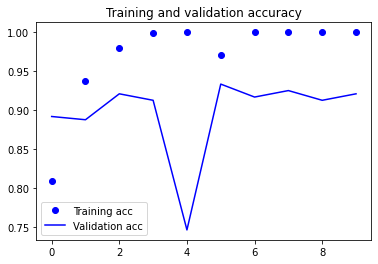

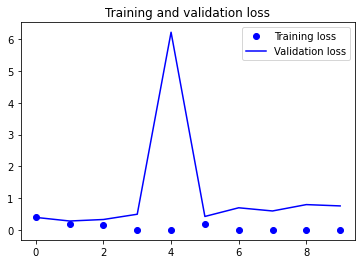

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()